In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib notebook
matplotlib.style.use('ggplot') # Look Pretty

In [2]:
def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

  # Plot the test original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.axis('tight')
  plt.title('K = ' + str(p['n_neighbors']))

In [3]:
# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
X = pd.read_csv('Datasets/wheat.data')
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [4]:
# checking NAN's
X[pd.isnull(X).any(axis=1)]

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
7,7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


In [5]:
#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
y = X['wheat_type']
print(y.head())
X.drop(['wheat_type'],axis = 1, inplace= True, errors= 'ignore')

0    kama
1    kama
2    kama
3    kama
4    kama
Name: wheat_type, dtype: object


In [6]:
Y=  pd.DataFrame(y)
Y['wheat_type'] = Y['wheat_type'].astype('category')
Y.dtypes
cat_columns = Y.select_dtypes(['category']).columns
Y[cat_columns] = Y[cat_columns].apply(lambda x: x.cat.codes)
Y.head()

,wheat_type
0,1
1,1
2,1
3,1
4,1


In [7]:
#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
X.compactness.fillna( X.compactness.mean(), inplace= True )
X.groove.fillna( X.groove.mean(), inplace= True )
X.width.fillna( X.width.mean(), inplace= True )
X[pd.isnull(X).any(axis=1)]

,id,area,perimeter,compactness,length,width,asymmetry,groove


In [8]:
#
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.33, random_state=1)

In [9]:

# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..



#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# X_train = preprocessing.Normalizer().fit(X_train)
# X_test = preprocessing.Normalizer().fit_transform(X_test)
normalizer_model = preprocessing.Normalizer().fit(X_train)
X_train= pd.DataFrame(normalizer_model.fit_transform(X_train))
X_test= pd.DataFrame(normalizer_model.fit_transform(X_test))

In [10]:
def doPCA(data, dimensions=2):
  from sklearn.decomposition import RandomizedPCA
  model = RandomizedPCA(n_components=dimensions)
  model.fit(data)
  return model

In [11]:
model_train_pca= doPCA(X_train, dimensions=2)
#model_test_pca= doPCA(X_test, dimensions=2)

In [12]:
X_train_pca= model_train_pca.transform(X_train)
X_test_pca= model_train_pca.transform(X_test)

In [13]:
X_train_after_pca=pd.DataFrame(X_train_pca)
X_test_after_pca=pd.DataFrame(X_test_pca)

In [14]:

#
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..
model = KNeighborsClassifier(n_neighbors=1)
knn=model.fit(X_train_after_pca, Y_train['wheat_type']) 

<IPython.core.display.Javascript object>


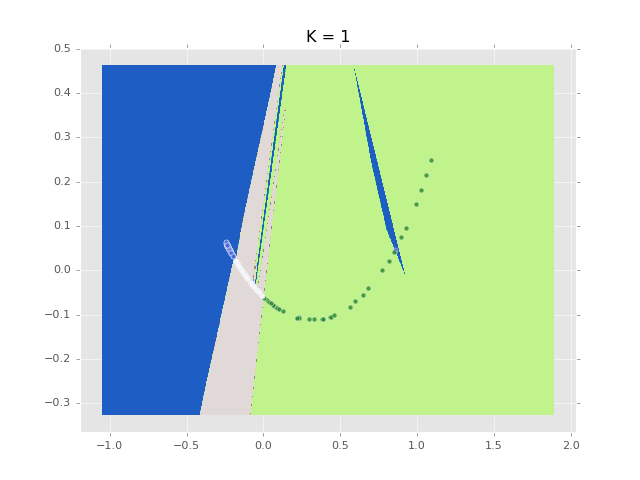

In [15]:
plotDecisionBoundary(knn, X_train_pca, Y_train['wheat_type'])

In [16]:
#------------------------------------
#
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
print(knn.score(X_test_after_pca,Y_test['wheat_type']))

# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..


0.9
